In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

660

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0dc4f5b3f209732cef8733e3b679309


In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | caramay
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | kunashak
Processing Record 6 of Set 1 | ixtapa
Processing Record 7 of Set 1 | ganzhou
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | corning
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | lasalgaon
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | hermanus
Process

Processing Record 36 of Set 4 | methoni
Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | rawson
Processing Record 39 of Set 4 | khasan
Processing Record 40 of Set 4 | cienfuegos
Processing Record 41 of Set 4 | srandakan
Processing Record 42 of Set 4 | ulladulla
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | stoyba
City not found. Skipping...
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | pangody
Processing Record 48 of Set 4 | surab
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | skibbereen
Processing Record 4 of Set 5 | khonuu
City not found. Skipping...
Processing Record 5 of Set 5 | asilah
Processing Record 6 of Set 5 | luangwa
Processing Record 7 of Set 5 | br

Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | ypsonas
Processing Record 30 of Set 8 | saldanha
Processing Record 31 of Set 8 | kamyshevatskaya
Processing Record 32 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 33 of Set 8 | uchaly
Processing Record 34 of Set 8 | west bay
Processing Record 35 of Set 8 | bell ville
Processing Record 36 of Set 8 | slyudyanka
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | urrao
Processing Record 39 of Set 8 | dibulla
Processing Record 40 of Set 8 | tougue
Processing Record 41 of Set 8 | aniva
Processing Record 42 of Set 8 | severnyy-kospashskiy
Processing Record 43 of Set 8 | ndioum
Processing Record 44 of Set 8 | andros town
Processing Record 45 of Set 8 | suslovo
Processing Record 46 of Set 8 | mbaiki
Processing Record 47 of Set 8 | lumphat
Processing Record 48 of Set 8 | salinas
Processing Record 49 of Set 8 | kavieng
Processing Record 50 of Set 8 | berlevag
Processing Record

Processing Record 17 of Set 12 | gallipoli
Processing Record 18 of Set 12 | pacifica
Processing Record 19 of Set 12 | praia
Processing Record 20 of Set 12 | lompoc
Processing Record 21 of Set 12 | kikwit
Processing Record 22 of Set 12 | rosarito
Processing Record 23 of Set 12 | grand-santi
Processing Record 24 of Set 12 | sao bartolomeu de messines
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | haines junction
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | cruzeiro do sul
Processing Record 29 of Set 12 | benidorm
Processing Record 30 of Set 12 | taloqan
Processing Record 31 of Set 12 | encruzilhada do sul
Processing Record 32 of Set 12 | rabak
Processing Record 33 of Set 12 | honiara
Processing Record 34 of Set 12 | homestead
Processing Record 35 of Set 12 | north platte
Processing Record 36 of Set 12 | nieves
Processing Record 37 of Set 12 | yamada
Processing Record 38 of Set 12 | luyang
Processing Record 39 of Set 12 | mbale

In [10]:
len(city_data)

615

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caramay,10.18,119.24,85.14,74,61,11.56,PH,2020-04-28 02:53:35
1,New Norfolk,-42.78,147.06,68.00,47,94,5.99,AU,2020-04-28 02:48:02
2,Georgetown,5.41,100.34,86.00,83,20,5.82,MY,2020-04-28 02:51:52
3,Dikson,73.51,80.55,20.88,95,100,13.09,RU,2020-04-28 02:48:04
4,Kunashak,55.70,61.55,48.20,87,40,4.47,RU,2020-04-28 02:53:36
5,Ixtapa,20.70,-105.20,77.00,69,5,2.71,MX,2020-04-28 02:53:36
6,Ganzhou,28.82,115.43,73.27,52,0,4.52,CN,2020-04-28 02:53:36
7,Corning,42.14,-77.05,37.99,81,1,1.86,US,2020-04-28 02:48:58
8,Castro,-24.79,-50.01,56.64,72,24,7.61,BR,2020-04-28 02:53:37
9,Lasalgaon,20.15,74.23,83.82,28,0,0.81,IN,2020-04-28 02:53:37


In [12]:
new_column_order = ["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caramay,PH,2020-04-28 02:53:35,10.18,119.24,85.14,74,61,11.56
1,New Norfolk,AU,2020-04-28 02:48:02,-42.78,147.06,68.00,47,94,5.99
2,Georgetown,MY,2020-04-28 02:51:52,5.41,100.34,86.00,83,20,5.82
3,Dikson,RU,2020-04-28 02:48:04,73.51,80.55,20.88,95,100,13.09
4,Kunashak,RU,2020-04-28 02:53:36,55.70,61.55,48.20,87,40,4.47
...,...,...,...,...,...,...,...,...,...
610,Dwarka,IN,2020-04-28 02:55:47,22.24,68.97,82.15,77,0,13.78
611,Nizwa,OM,2020-04-28 02:52:03,22.93,57.53,86.54,29,0,2.13
612,Oyama,JP,2020-04-28 02:55:47,36.30,139.80,59.00,54,40,8.05
613,Kathmandu,NP,2020-04-28 02:54:26,27.72,85.32,62.60,88,75,2.24


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/27/20'

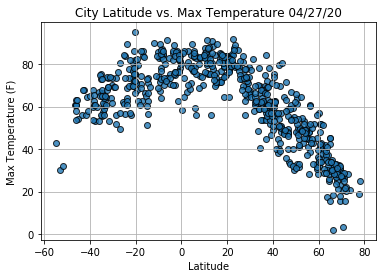

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

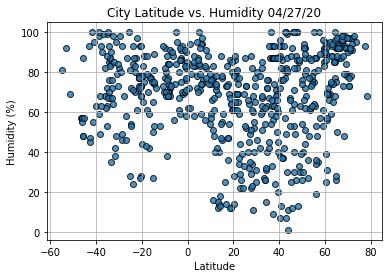

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

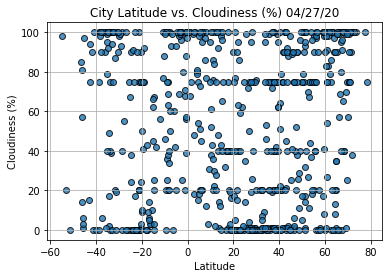

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

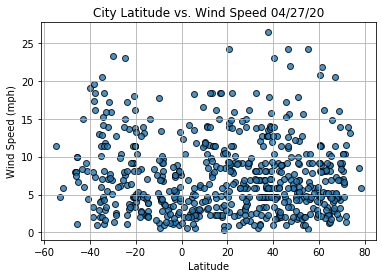

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

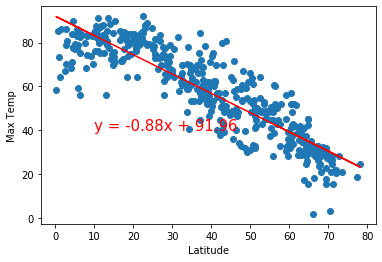

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

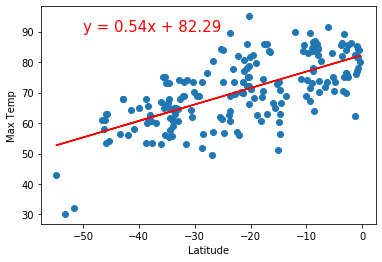

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

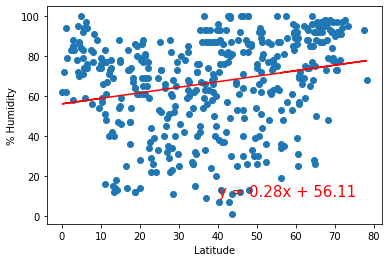

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

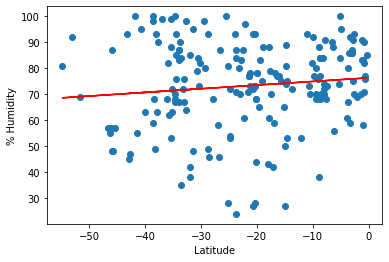

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

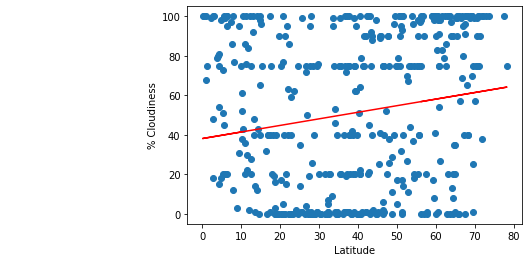

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

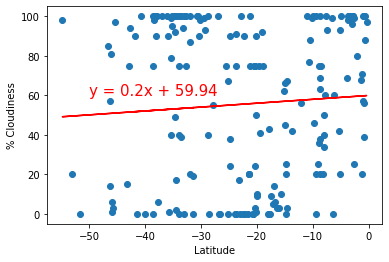

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

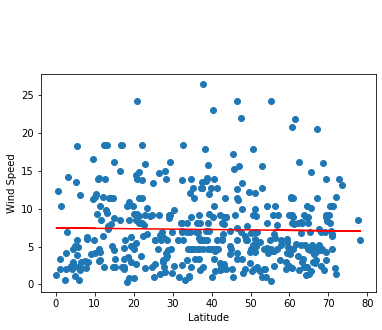

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

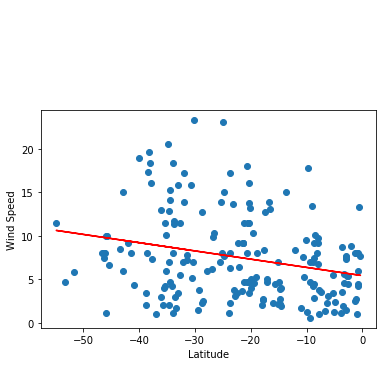

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))